### **1. Load the dataset**

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print('train shape :', train_x.shape, train_y.shape)
print('test shape :', test_x.shape, test_y.shape)

train shape : (60000, 28, 28) (60000,)
test shape : (10000, 28, 28) (10000,)


### **2. Explore the data**

In [ ]:
import pandas as pd

pd.DataFrame(train_x[0, :, :])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,...,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,...,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,...,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,...,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,...,235,227,224,222,224,221,223,245,173,0


In [ ]:
type(train_y[0]), train_y[0]

(numpy.uint8, 9)

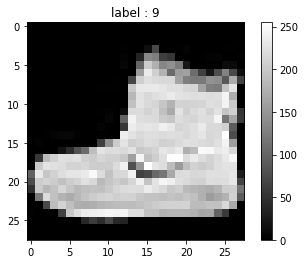

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_x[0], cmap='gray')
plt.title(f'label : {train_y[0]}')
plt.colorbar()
plt.show()

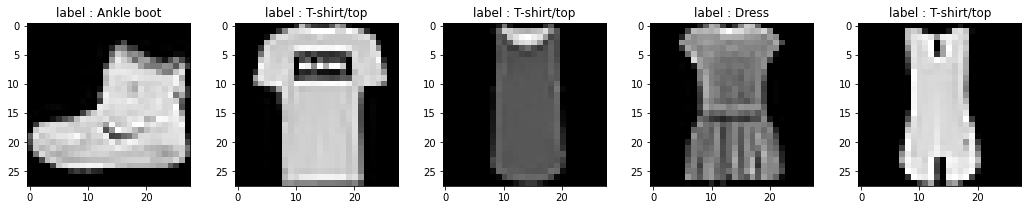

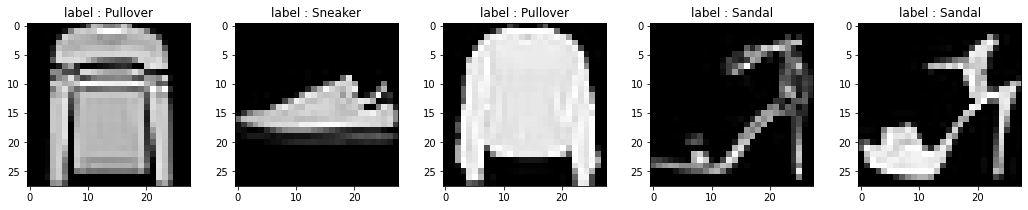

In [ ]:
def show_images(x, y, ncols=5):
  fig, axs = plt.subplots(nrows=1, ncols=ncols, figsize=(18, 3))
  for i in range(ncols):
    axs[i].imshow(x[i], cmap='gray')
    axs[i].set_title(f'label : {class_names[y[i]]}')

show_images(train_x[:5], train_y[:5], ncols=5)
show_images(train_x[5:10], train_y[5:10], ncols=5)

### **3. Preprocess the data**

In [ ]:
import numpy as np

def data_preprocessing(x, y):
  x = np.array(x/255.0, dtype=np.float32)
  y = np.array(y, dtype=np.float32)
  return x, y

(train_x, train_y) = data_preprocessing(train_x, train_y)
(test_x, test_y) = data_preprocessing(test_x, test_y)

In [ ]:
pd.DataFrame(train_x[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003922,0.015686,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.211765,0.000000,0.000000,0.000000,0.003922,0.011765,0.015686,0.000000,0.000000,0.011765
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.564706,0.482353,0.090196,0.000000,0.000000,0.000000,0.000000,0.047059,0.039216,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.419608,0.611765,0.631373,0.427451,0.250980,0.090196,0.301961,0.509804,0.282353,0.058824
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.847059,0.639216,0.498039,0.474510,0.478431,0.572549,0.552941,0.345098,0.674510,0.258824
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,...,0.874510,0.874510,0.843137,0.835294,0.643137,0.498039,0.482353,0.768627,0.898039,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.921569,0.890196,0.878431,0.870588,0.878431,0.866667,0.874510,0.960784,0.678431,0.000000


In [ ]:
type(train_y[0]), train_y[0]

(numpy.float32, 9.0)

### **4. Build the model**

#### **1) Set up the layers**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(32, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


#### **2) Compile the model**

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.utils import to_categorical

train_y_ohe = to_categorical(train_y)
test_y_ohe = to_categorical(test_y)
print(train_y_ohe.shape, test_y_ohe.shape)

(60000, 10) (10000, 10)


In [ ]:
print(train_y[:5], train_y_ohe[:5], sep='\n')
print(test_y[:5], test_y_ohe[:5], sep='\n')

[9. 0. 0. 3. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[9. 2. 1. 1. 6.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### **5. Train the model**

In [ ]:
history = model.fit(train_x, train_y_ohe, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 9s 2ms/step - loss: 0.5266 - accuracy: 0.8154
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3925 - accuracy: 0.8588
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3611 - accuracy: 0.8685
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3415 - accuracy: 0.8741
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3248 - accuracy: 0.8804
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3134 - accuracy: 0.8848
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3008 - accuracy: 0.8882
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2911 - accuracy: 0.8919
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2851 - accuracy: 0.8950
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.277

In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.5266413688659668, 0.3924979269504547, 0.36110442876815796, 0.3414856493473053, 0.3248233199119568, 0.3134249448776245, 0.30084848403930664, 0.291128933429718, 0.28505176305770874, 0.2771492302417755, 0.2705543637275696, 0.2617327868938446, 0.2590669095516205, 0.2537168860435486, 0.24756526947021484, 0.2415941208600998, 0.23749016225337982, 0.23378108441829681, 0.22925539314746857, 0.22538542747497559]
[0.8154333233833313, 0.8587999939918518, 0.8684666752815247, 0.8740666508674622, 0.8803666830062866, 0.8847833275794983, 0.8881666660308838, 0.8918833136558533, 0.8949666619300842, 0.8961666822433472, 0.8989333510398865, 0.902899980545044, 0.9035500288009644, 0.9052000045776367, 0.9071999788284302, 0.9094666838645935, 0.9108666777610779, 0.9124333262443542, 0.9143333435058594, 0.9143499732017517]


### **6. Make prediction**

In [ ]:
pred_proba = model.predict(test_x)

In [ ]:
pd.DataFrame(pred_proba)

,0,1,2,3,4,5,6,7,8,9
0,6.172897e-08,1.864455e-09,8.306584e-09,9.491466e-09,7.539322e-09,4.318183e-05,1.339739e-09,1.341602e-02,8.759109e-08,9.865406e-01
1,6.435530e-05,1.227103e-12,9.995331e-01,7.915798e-09,2.870049e-04,5.751959e-15,1.154528e-04,6.806696e-21,6.557188e-08,2.143328e-19
2,6.389338e-09,1.000000e+00,1.094580e-10,8.022039e-09,6.503669e-10,1.640845e-14,9.601938e-11,3.708322e-26,7.355277e-16,1.581853e-19
3,3.232178e-08,9.999995e-01,2.033428e-09,3.288317e-07,6.767834e-08,6.830329e-11,1.970415e-09,1.949714e-22,5.904312e-13,2.993258e-15
4,2.649392e-01,5.784059e-08,6.218609e-02,1.026453e-02,1.996402e-03,1.118909e-08,6.600236e-01,1.521435e-09,5.900160e-04,7.134449e-08
...,...,...,...,...,...,...,...,...,...,...
9995,4.979938e-13,1.158713e-11,3.107147e-18,1.871498e-18,1.169509e-13,2.442867e-08,2.166813e-19,1.436703e-04,3.544065e-17,9.998562e-01
9996,3.344040e-05,9.999279e-01,4.006354e-06,2.598935e-05,5.934779e-06,1.246098e-07,2.573213e-06,3.361332e-16,1.165980e-09,7.078636e-11
9997,1.951974e-06,4.673668e-14,7.303872e-07,1.118565e-07,7.495294e-08,5.946203e-17,1.087445e-08,4.516676e-13,9.999971e-01,2.809388e-17
9998,1.167529e-06,9.999477e-01,9.730099e-07,3.440481e-05,9.568950e-07,1.470842e-05,2.547341e-08,6.195854e-15,1.188618e-08,1.198238e-08


In [ ]:
pred_proba_test = model.predict(np.expand_dims(test_x[0], axis=0))
print('test output :', pred_proba_test)

test output : [[6.1729082e-08 1.8644515e-09 8.3065679e-09 9.4914840e-09 7.5393070e-09
  4.3181826e-05 1.3397391e-09 1.3416003e-02 8.7591260e-08 9.8654062e-01]]


In [ ]:
pred_proba_test = np.argmax(pred_proba_test)
pred_proba_test

9

In [ ]:
pred_class = np.squeeze(pred_proba_test)
print('predicted class value :', class_names[pred_class])

predicted class value : Ankle boot
